## Exercise Neural Network Training:
The exercise is meant to build some understanding about how neural networks learn relationships between features x and a 
target y. The exercise deals with gradient descent. In this exercises we assume that students are familiar with the general form of neural networks. Hence, the architecture of neural networks is not part of the exercises. We recommend going through "Ex04-NN-Primer-part1.ipynb". It covers the architecture of neural networks as well as the learning procedure, which is part of this exercise.    

"Ex04-NN-Primer-part1.ipynb" treats topics like gradient descent for neural networks of general architecture. For this exercise, we restrict the architecture of the considered neural networks to the form
$f(x)=\beta\cdot sigmoid(x)$. This corresponds to a very simple neural network with linear output function, sigmoid activation, 1 hidden layer and bias (constants) forced to zero. By considering this simple neural network, the code becomes simpler and you can (hopefully) gain a better intuition of neural networks learning procedures.  

In the tuturial to this exercise, we will go through further exercises covering back propagation and stochastic gradient descent.

In [11]:
## required libraries
import numpy as np
import matplotlib.pyplot as plt

In [12]:
## define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## create data
x = np.array(range(-10,10))
y = 2*sigmoid(x)

# Exercise:
Our goal is to find the coefficient beta, such that the function $f(x)=\beta\cdot sigmoid(x)$ fits the data best 
(according to the mean squared error).  
Your task is to implement gradient descent in order to find beta. This means in detail: <br />
a) You need to calculate the derivative of the loss function $L(Y,f(X))=\frac{1}{n}\sum_{i}(y_{i}-f(x_{i}))^{2}$ in $\beta$. For simplicity we provide an impementation
of this loss function called "grad_beta"

In [13]:
def func_f(beta, x):
    return beta*sigmoid(x)

def grad_beta(beta, y, x): 
    return np.mean(-2*(y-func_f(beta, x))*sigmoid(x))

b) Implement a function grad_desc(beta_ini, lrate, n_epochs), with an initial value of beta,
the learning rate and the number of iterations (called epochs) as parameters. The function should find the $\beta$ leading to the minimum loss.

In [21]:
def grad_desc(beta_ini, lrate, n_epochs):
    '''find beta leading to the minimum loss'''
    beta = beta_ini
    
    n = 0
    while n < n_epochs:
        gBeta = grad_beta(beta, y, x) # calculate gradient
        beta -= lrate*gBeta # gradient descent
        n += 1
        
    return beta

c) Apply your function for beta_ini=0, n_epochs=20 and some learning rates of your choice.
Which is the best learning rate? What happens for particularly high or low learning rates?

In [22]:
beta1 = grad_desc(0, 0.1, 20)

In [23]:
beta1

1.6615938383488589

In [30]:
learning_rates = [0.0001, 0.001, 0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

In [38]:
betas = list()

In [39]:
for lr in learning_rates:
    betas.append(grad_desc(0, lr, 20))

In [40]:
betas

[0.0067888554854687215,
 0.06688605024658403,
 0.5785348243411792,
 1.1529781098894856,
 1.6479792283221757,
 1.942740634878271,
 1.9914571144843094,
 1.998840972732177,
 1.999858429294132,
 1.9999846120567901,
 1.999999879041494,
 1.999999999513002]

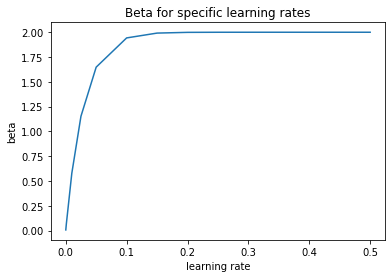

In [41]:
plt.plot(learning_rates, betas)
plt.xlabel("learning rate")
plt.ylabel("beta")
plt.title("Beta for specific learning rates");